# KNN Distance Matrix

Here, we run a KNN classifier using a distance matrix. The classifier is run on multiple randomized training and testing sets, where the number of iterations can be specified with the _nBootstrapping_ parameter in the function ``KNN_bootstrapping``. The classifier can try multiple values for k, and the results from the k that resulted in the highest classification score (F1) will be outputted. k can be specified in the same function, for example, one can write:
``kNeighbours=np.int_(np.linspace(3, 12, 10))``

#### Imports

In [1]:
import numpy as np
import pandas as pd
from KNN_distanceMatrix import *
import os
import tqdm

#### Data

In [29]:
# THINGS TO EDIT:
pth = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"
dfMeta = pd.read_csv(pth+"Final_Leaves_Index.csv")
pth2 = "C:\\Users\\arian\\Documents\\Github\\KiwiContours\\"
dfDists = pd.read_csv(pth2+"Leaves_Open_Distances.csv")
classType = int #NOTE: if you're classes are integers e.g. Species 1-10, then write int, else, if they're stings, write str

############################################
classes = np.unique(list(dfMeta['Species']))

dfMeta = dfMeta.rename(columns={'Species':'Class'})

In [6]:
pth = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells_distmats\\v2\\SRVF_Open_shells_v2.csv"
dfDists = pd.read_csv(pth)

In [5]:
dfMeta = dfMeta.rename(columns={'Genus ID':'Class'})

#### KNN Bootstrapping

In [9]:
results = KNN_Bootstrapping(
    dfMeta,
    dfDists,
    classes,
    nBootstrapping=10,
    classType=classType,
    trainingSetSize=12,
    trainingProportion=0
)

In [37]:
print("SRVF Closed New Old:")
print([np.average(results['allF1Scores']),np.median(results['allF1Scores']),np.max(results['allF1Scores'])])

SRVF Closed New Old:
[0.8385999752144547, 0.8406490034309726, 0.8807210029070678]


In [5]:
print("SRVF Open:")
print([np.average(results['allF1Scores']),np.median(results['allF1Scores']),np.max(results['allF1Scores'])])

SRVF Open:
[0.8348457609958851, 0.8346497857927566, 0.9041812604534721]


In [10]:
print("Eigenshape:")
print([np.average(results['allF1Scores']),np.median(results['allF1Scores']),np.max(results['allF1Scores'])])

Eigenshape:
[0.7046869362020381, 0.7069059378477347, 0.7474870686968984]


#### Saving Results

In [8]:
# Save classification results that outputted the highest F1 score in the KNN bootstrapping:
results['topClassification'].to_csv('ClassificationTest.csv',index=False)

In [19]:
# Save the F1 scores from the KNN bootstrapping:
pd.DataFrame(results['allF1Scores'])
pd.DataFrame(results['allF1Scores']).to_csv('allF1Scores_Test.csv',index=False)

,0,1,2,3,4
0,0.825791,0.798759,0.762409,0.784465,0.775548


In [20]:
# Save the randomized training sets from the KNN bootstrapping, in case you need to recreate the results:
pd.DataFrame(results['allTrainingSamples']).T.to_csv('allTrainingSamples.csv',index=False)

In [5]:
# Save training and testing samples from the top KNN test:
topTraining = results['topTrainingTesting'][0]
topTesting = results['topTrainingTesting'][1]
all_names = list(dfMeta['Name'])
training_testing = ["train" if nm in topTraining else "test" for nm in all_names]
trainTestData = pd.DataFrame([all_names,training_testing]).T
trainTestData = trainTestData.rename(columns={0: "Name", 1: "Train_Test"})
trainTestData.to_csv('trainingTestingSamples.csv',index=False)

In [7]:
trainTestData[trainTestData['Train_Test']=='train']

,Name,Train_Test
1,l10nr002,train
2,l10nr003,train
8,l10nr011,train
16,l10nr039,train
21,l10nr046,train
...,...,...
418,l9nr009,train
423,l9nr015,train
428,l9nr021,train
433,l9nr027,train


In [29]:
all_classification = pd.concat([allClass for allClass in results['allClassificationResults']],axis=1)
    
all_classification.to_csv('allClassificationResults.csv',index=False)

### Post-Training

In [30]:
training = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\training_leaves.csv")

In [32]:
all_names = list(dfMeta['Name'])

In [22]:
bla = [nm for nm in all_names if nm not in list(training['99'])]

In [24]:
results, f1Score, topNeighbour = KNN_distMat(
    dfDists,
    dfMeta,
    list(training['99']),
    bla,
    classType=classType,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
)


In [33]:
scores_s_o = []

for i in tqdm.tqdm(range(0,100)):
    train = list(training[str(i)])
    test = [nm for nm in all_names if nm not in train]
    
    results, f1Score, topNeighbour = KNN_distMat(
    dfDists,
    dfMeta,
    train,
    test,
    classType=classType,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
    )
    scores_s_o.append(f1Score)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:38<00:00,  6.98s/it]


In [35]:
pd.DataFrame(scores_s_o).to_csv('Leaves_SRVF_Open_KNN.csv')

In [34]:
print("SRVF o:")
print([np.average(scores_s_o),np.median(scores_s_o),np.max(scores_s_o),np.std(scores_s_o)])

SRVF o:
[0.9381640713775568, 0.9411052890055542, 0.9713496630536274, 0.01743635094226427]


In [40]:
print("Eigenshape:")
print([np.average(scores_e),np.median(scores_e),np.max(scores_e),np.std(scores_e)])

Eigenshape:
[0.7109934783748286, 0.71007873790031, 0.7838388021992815, 0.0317891773691116]


In [41]:
print("SRVF c:")
print([np.average(scores_s_c),np.median(scores_s_c),np.max(scores_s_c),np.std(scores_s_c)])

SRVF c:
[0.8366502044562283, 0.8364088841332429, 0.8989221213569039, 0.027124969213393326]


In [10]:
print("SRVF o:")
print([np.average(scores_s_o),np.median(scores_s_o),np.max(scores_s_o),np.std(scores_s_o)])

SRVF o:
[0.8437765351970102, 0.8418624700341941, 0.9037217455932013, 0.02894833450441365]


In [36]:
import os

In [39]:
# THINGS TO EDIT:
pth = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"
dfMeta = pd.read_csv(pth+"Shells_Index2.csv")
classType = int #NOTE: if you're classes are integers e.g. Species 1-10, then write int, else, if they're stings, write str
classes = np.unique(list(dfMeta['Genus']))

dfMeta = dfMeta.rename(columns={'Genus':'Class'})

###########

pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells_distmats\\v2"

all_scores = []

for dm in os.listdir(pth_):
    dfDists = pd.read_csv(pth_+"\\"+dm)
    
    scores = []
    for i in tqdm.tqdm(range(0,100)):
        train = list(training[str(i)])
        test = [nm for nm in all_names if nm not in train]

        results, f1Score, topNeighbour = KNN_distMat(
        dfDists,
        dfMeta,
        train,
        test,
        classType=classType,
        neighbours=np.int_(np.linspace(3, 12, 10)),
        f1Average="weighted",
        inMeta=True,
        )
        scores.append(f1Score)
    print(dm)
    print([np.average(scores),np.median(scores),np.max(scores),np.std(scores)])

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Eigenshape_shells222.csv
[0.7339227089885534, 0.7372469437792323, 0.8170769973567703, 0.03306123531818227]


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Shells_SRVF_Closed_oldCode.csv
[0.8499183225360382, 0.8507880075186314, 0.9038606010666502, 0.02610381997014297]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:02<00:00,  3.03s/it]

SRVF_Open_shells_v2.csv
[0.8437765351970102, 0.8418624700341941, 0.9037217455932013, 0.02894833450441365]


In [2]:
pth = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"
dfMeta = pd.read_csv(pth+"Shells_Index2.csv")

In [12]:
tr = list(dfMeta[dfMeta['Test_Train']=='train']['Name'])
te = list(dfMeta[dfMeta['Test_Train']=='test']['Name'])

In [71]:
#pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells_distmats\\v2\\Shells_SRVF_Closed_oldCode.csv"
pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\All_DistMats\\Shells\\shells_dists_srvf_all.csv"
dfMeta = dfMeta.rename(columns={'Genus':'Class'})

dfDists = pd.read_csv(pth_)

results, f1Score, topNeighbour = KNN_distMat(
    dfDists,
    dfMeta,
    tr,
    te,
    classType=int,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
)

In [72]:
f1Score

0.8413792584227366

In [11]:
f1Score

0.8122446173863943

In [13]:
f1Score

0.8357607470553096

In [31]:
classes = np.unique(list(dfMeta['Class']))


In [76]:
CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)
cm_df_sc = pd.DataFrame(CM)

In [5]:
from sklearn.metrics import confusion_matrix


In [40]:
CM

array([[ 91.66666667,   9.09090909,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  8.33333333,  81.81818182,   8.33333333,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   9.09090909,  91.66666667,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 100.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   9.09090909,
         91.66666667,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  81.81818182,   8.33333333,  10.        ,
          0.        ,   0.        ],
       [  

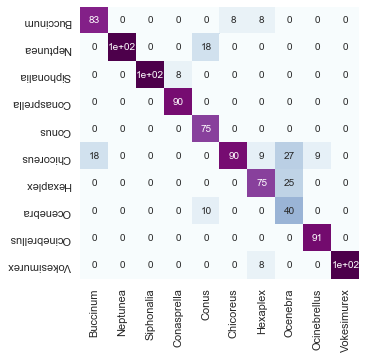

In [42]:
CM = confusion_matrix(list(dfres["Actual"]), list(dfres["Predicted"]),labels=classes)


CM = CM / CM.astype(np.float).sum(axis=1)

CM = np.int_(CM * 100)

cm_df_sc = pd.DataFrame(CM).T

fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size":10})
ax.set_xticklabels(nms,rotation=90)
ax.yaxis.set_ticklabels(nms,rotation=180)
plt.show()

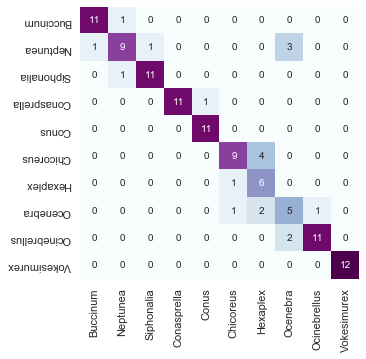

In [16]:
CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)
cm_df_sc = pd.DataFrame(CM).T

fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax.set_xticklabels(nms,rotation=90)
ax.yaxis.set_ticklabels(nms,rotation=180)
plt.show()

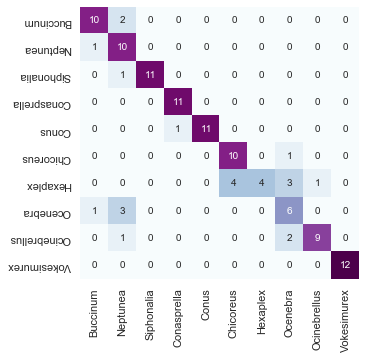

In [53]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax.set_xticklabels(nms,rotation=90)
ax.yaxis.set_ticklabels(nms,rotation=180)
plt.show()

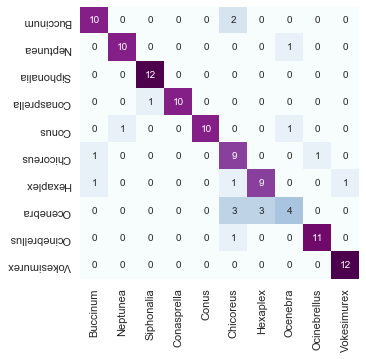

In [77]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax.set_xticklabels(nms,rotation=90)
ax.yaxis.set_ticklabels(nms,rotation=180)
plt.show()

In [7]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 


In [8]:
shells_ind2 = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\Shells_Final_Index.csv")

In [9]:
nms = [shells_ind2[shells_ind2['Genus ID']==cl]['Genus'].iloc[0] for cl in classes]

In [3]:
dfres = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\KNN_Results\\KNN\\Shells_KNN_SRVF.csv")

In [119]:
IDs = [dfMeta[dfMeta['Name']==nm]['ID'].iloc[0] for nm in list(results['Name'])]

In [120]:
results['IDs'] = IDs

In [98]:
np.round(f1_score(list(dfres['Actual']), list(dfres['Predicted']), average='weighted'),3)

0.848

In [21]:
files = ['shells2_dists_SRVF_scaled_all.csv',
 'shells_dists_proc_srvf_UnitLength_all.csv',
 'shells_dists_srvf_all.csv',
 'shells_dists_SRVF_nonpro_all.csv',
 'shells_dists_SRVF_nonpro_all2.csv',
 'shells_dists_SRVF_proc_all.csv',
 'shells_dists_test_sample_SRVF_proc_UnitLength_all.csv',
 'shells_dists_updatedsample2_SRVF_proc_UnitLength_all.csv',
 'shells_dists_updatedsample_SRVF_proc_UnitLength_all.csv',
 'shells_final_dists_SRVF_proc_all.csv',
 'Shells_SRVF_Closed_oldCode.csv',
 'SRVF_Closed_shells.csv',
 'All_DistMats\\Best_S\\shells_dists_srvf_all - Copy.csv',
 'All_DistMats\\Best_S\\shells_dists_srvf_all.csv',
 'All_DistMats\\Shells\\shells_dists_srvf_all.csv',
 'DistMats\\Edited\\shells2_dists_SRVF_scaled_all.csv',
 'KNN\\DMs\\Shells_SRVF.csv',
 'shells_distmats\\v1\\Shells_SRVF_Closed_oldCode.csv',
 'shells_distmats\\v2\\Shells_SRVF_Closed_v2.csv']

In [103]:

pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"+files[0]

dfDists = pd.read_csv(pth_)

In [124]:
results2 = results.sort_values('IDs')
dfres2 = dfres.sort_values('ID')

In [126]:
list(results2['IDs']) == list(dfres2['ID'])

True

In [131]:
np.where(np.array(list(results2['predictedClass'] == dfres2['Predicted']))==False)[0]

array([  1,   7,  19,  32,  41,  49,  53,  56,  59,  65,  69,  70,  71,
        72,  74,  77,  78,  79,  81,  84,  85,  87,  88,  89,  90,  95,
       100, 101], dtype=int64)

In [109]:
for pth in files:
    
    pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"+pth

    dfDists = pd.read_csv(pth_)
    
    if len(dfDists) < 237:

        results, f1Score, topNeighbour = KNN_distMat(
            dfDists,
            dfMeta,
            tr,
            te,
            classType=int,
            neighbours=np.int_(np.linspace(3, 12, 10)),
            f1Average="weighted",
            inMeta=True,
        )

        f1 = np.round(f1_score(list(results['actualClass']), list(results['predictedClass']), average='weighted'),3)
        print([pth,f1])

['shells2_dists_SRVF_scaled_all.csv', 0.831]
['shells_dists_srvf_all.csv', 0.841]
['shells_dists_SRVF_nonpro_all.csv', 0.052]
['shells_dists_SRVF_nonpro_all2.csv', 0.862]
['shells_dists_SRVF_proc_all.csv', 0.862]
['shells_final_dists_SRVF_proc_all.csv', 0.831]
['Shells_SRVF_Closed_oldCode.csv', 0.836]
['SRVF_Closed_shells.csv', 0.721]
['All_DistMats\\Best_S\\shells_dists_srvf_all - Copy.csv', 0.841]
['All_DistMats\\Best_S\\shells_dists_srvf_all.csv', 0.841]
['All_DistMats\\Shells\\shells_dists_srvf_all.csv', 0.841]
['DistMats\\Edited\\shells2_dists_SRVF_scaled_all.csv', 0.831]
['KNN\\DMs\\Shells_SRVF.csv', 0.841]
['shells_distmats\\v1\\Shells_SRVF_Closed_oldCode.csv', 0.836]
['shells_distmats\\v2\\Shells_SRVF_Closed_oldCode.csv', 0.812]


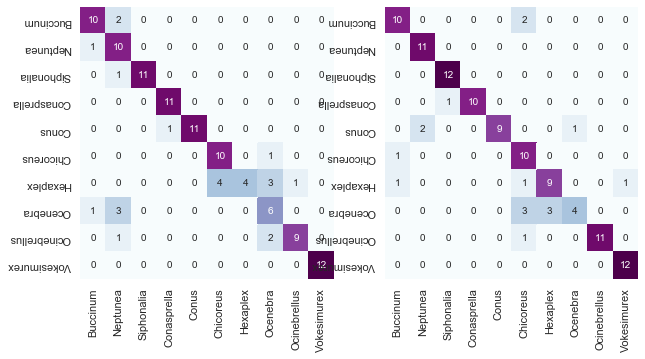

In [70]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)
cm_df_sc = pd.DataFrame(CM)

sns.heatmap(cm_df_sc,ax=ax[0],cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax[0].set_xticklabels(nms,rotation=90)
ax[0].yaxis.set_ticklabels(nms,rotation=180)

CM = confusion_matrix(list(dfres["Actual"]), list(dfres["Predicted"]),labels=classes)
cm_df_sc = pd.DataFrame(CM)

sns.heatmap(cm_df_sc,ax=ax[1],cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax[1].set_xticklabels(nms,rotation=90)
ax[1].yaxis.set_ticklabels(nms,rotation=180)


plt.show()

In [81]:
scores_s_c = []

for i in tqdm.tqdm(range(0,100)):
    train = list(training[str(i)])
    test = [nm for nm in all_names if nm not in train]
    
    results, f1Score, topNeighbour = KNN_distMat(
    dfDists,
    dfMeta,
    train,
    test,
    classType=int,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
    )
    scores_s_c.append(f1Score)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:11<00:00,  3.11s/it]


In [84]:
dfDists

,Name,1_11_137_455,1_11_137_456,1_11_137_457,1_11_137_458,1_11_137_459,1_11_137_460,1_11_137_461,1_11_137_462,1_11_80_243,...,3_241_2494_11397,3_241_2494_11398,3_241_2505_11470,3_241_2505_11471,3_241_2505_11472,3_241_2505_11473,3_241_2505_11474,3_241_2505_11475,3_241_2505_11476,3_241_2505_11477
0,1_11_137_455,0.000,0.127,0.146,0.181,0.177,0.154,0.196,0.190,0.158,...,0.560,0.626,0.378,0.354,0.343,0.400,0.425,0.419,0.518,0.378
1,1_11_137_456,0.127,0.000,0.121,0.173,0.144,0.149,0.184,0.218,0.147,...,0.574,0.599,0.403,0.377,0.353,0.415,0.444,0.415,0.530,0.382
2,1_11_137_457,0.146,0.121,0.000,0.201,0.187,0.180,0.219,0.235,0.156,...,0.579,0.612,0.418,0.401,0.387,0.441,0.450,0.447,0.536,0.418
3,1_11_137_458,0.181,0.173,0.201,0.000,0.151,0.133,0.141,0.195,0.146,...,0.494,0.583,0.338,0.344,0.344,0.366,0.392,0.361,0.461,0.338
4,1_11_137_459,0.177,0.144,0.187,0.151,0.000,0.149,0.167,0.188,0.189,...,0.523,0.559,0.356,0.339,0.328,0.377,0.374,0.371,0.454,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,3_241_2505_11473,0.400,0.415,0.441,0.366,0.377,0.362,0.405,0.391,0.436,...,0.466,0.477,0.170,0.227,0.219,0.000,0.261,0.187,0.368,0.163
231,3_241_2505_11474,0.425,0.444,0.450,0.392,0.374,0.385,0.445,0.405,0.420,...,0.473,0.451,0.255,0.311,0.260,0.261,0.000,0.284,0.360,0.270
232,3_241_2505_11475,0.419,0.415,0.447,0.361,0.371,0.356,0.404,0.381,0.450,...,0.442,0.452,0.181,0.267,0.210,0.187,0.284,0.000,0.421,0.198
233,3_241_2505_11476,0.518,0.530,0.536,0.461,0.454,0.491,0.482,0.485,0.497,...,0.366,0.522,0.355,0.414,0.392,0.368,0.360,0.421,0.000,0.371


In [85]:
pth = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells_distmats\\v2\\"
c = pd.read_csv(pth+"Shells_SRVF_Closed_oldCode.csv").set_index('Name')

In [87]:
c2 = deepcopy(dfDists).set_index('Name')

In [89]:
c

,1_11_137_455,1_11_137_456,1_11_137_457,1_11_137_458,1_11_137_459,1_11_137_460,1_11_137_461,1_11_137_462,1_11_80_243,1_11_80_244,...,3_241_2494_11397,3_241_2494_11398,3_241_2505_11470,3_241_2505_11471,3_241_2505_11472,3_241_2505_11473,3_241_2505_11474,3_241_2505_11475,3_241_2505_11476,3_241_2505_11477
Name,,,,,,,,,,,,,,,,,,,,,
1_11_137_455,0.000000,0.127330,0.145651,0.181315,0.176753,0.153579,0.195756,0.190209,0.157734,0.161946,...,0.560140,0.626302,0.377683,0.353618,0.343465,0.399716,0.425178,0.419289,0.517773,0.377998
1_11_137_456,0.127330,0.000000,0.120981,0.172868,0.143931,0.149350,0.184390,0.218238,0.146769,0.147632,...,0.574396,0.599285,0.402628,0.377288,0.353481,0.415444,0.443869,0.414933,0.530267,0.381556
1_11_137_457,0.145651,0.120981,0.000000,0.201427,0.186707,0.180042,0.219017,0.234544,0.156118,0.151814,...,0.578923,0.612494,0.417819,0.400709,0.386698,0.441066,0.449848,0.447026,0.535790,0.417883
1_11_137_458,0.181315,0.172868,0.201427,0.000000,0.151295,0.132562,0.141384,0.195497,0.145833,0.159520,...,0.493723,0.582563,0.337531,0.343987,0.343717,0.366185,0.392426,0.360774,0.460808,0.338396
1_11_137_459,0.176753,0.143931,0.186707,0.151295,0.000000,0.149140,0.166986,0.188033,0.188831,0.155314,...,0.522710,0.558506,0.356126,0.339148,0.328086,0.376994,0.373919,0.371202,0.454046,0.340964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_241_2505_11473,0.399716,0.415444,0.441066,0.366185,0.376994,0.361674,0.404911,0.390820,0.436140,0.433248,...,0.465949,0.477147,0.169858,0.227475,0.218781,0.000000,0.260808,0.187291,0.368115,0.163310
3_241_2505_11474,0.425178,0.443869,0.449848,0.392426,0.373919,0.385003,0.445164,0.404576,0.420074,0.435286,...,0.473153,0.450839,0.254998,0.311497,0.260133,0.260808,0.000000,0.283560,0.360036,0.269976
3_241_2505_11475,0.419289,0.414933,0.447026,0.360774,0.371202,0.356327,0.403592,0.380567,0.450474,0.429340,...,0.441757,0.451903,0.180759,0.266769,0.209726,0.187291,0.283560,0.000000,0.420856,0.198310


In [93]:
c3 = pd.read_csv('C:\\Users\\arian\\Downloads\\Shells_SRVF.csv')#.set_index('Name')

In [14]:
dists =  "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells2_dists_SRVF_scaled_all.csv"
dists = pd.read_csv(dists)

results, f1Score, topNeighbour = KNN_distMat(
    dists,
    dfMeta,
    tr,
    te,
    classType=int,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
)

In [95]:
f1Score

0.8413792584227366

In [110]:
scores_s_c = []

dists =  "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells2_dists_SRVF_scaled_all.csv"

for i in tqdm.tqdm(range(0,100)):
    train = list(training[str(i)])
    test = [nm for nm in all_names if nm not in train]
    
    results, f1Score, topNeighbour = KNN_distMat(
    c3,
    dfMeta,
    train,
    test,
    classType=int,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
    )
    scores_s_c.append(f1Score)
    
print([np.average(scores_s_c),np.median(scores_s_c),np.max(scores_s_c),np.std(scores_s_c)])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:37<00:00,  3.37s/it]

[0.8365947200509486, 0.8369745375432196, 0.890226469182991, 0.027169491033424607]


In [97]:
    print([np.average(scores_s_c),np.median(scores_s_c),np.max(scores_s_c),np.std(scores_s_c)])

[0.8365947200509486, 0.8369745375432196, 0.890226469182991, 0.027169491033424607]


In [82]:
    print([np.average(scores_s_c),np.median(scores_s_c),np.max(scores_s_c),np.std(scores_s_c)])

[0.8365947200509486, 0.8369745375432196, 0.890226469182991, 0.027169491033424607]


In [112]:
pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"+files[-1]

dfDists = pd.read_csv(pth_)


results, f1Score, topNeighbour = KNN_distMat(
    dfDists,
    dfMeta,
    tr,
    te,
    classType=int,
    neighbours=np.int_(np.linspace(3, 12, 10)),
    f1Average="weighted",
    inMeta=True,
)


In [118]:
dfres

,ID,Actual,Predicted
0,459,11,11
1,460,11,11
2,461,11,11
3,462,11,11
4,247,11,11
...,...,...,...
110,11398,241,241
111,11474,241,241
112,11475,241,241
113,11476,241,241


In [116]:
list(results['Name']) == list(dfres['Name'])

KeyError: 'Name'

In [113]:
files[-1]

'shells_distmats\\v2\\Shells_SRVF_Closed_oldCode.csv'

In [19]:
['shells2_dists_SRVF_scaled_all.csv', 0.831,"correct"]
['shells_dists_srvf_all.csv', 0.841,"wrong"]
['shells_dists_SRVF_nonpro_all.csv', 0.052]
['shells_dists_SRVF_nonpro_all2.csv', 0.862,"wrong"]
['shells_dists_SRVF_proc_all.csv', 0.862,"wrong"]
['shells_final_dists_SRVF_proc_all.csv', 0.831,"true"]
['Shells_SRVF_Closed_oldCode.csv', 0.836,"wrong"]
['SRVF_Closed_shells.csv', 0.721,"wrong"]
['All_DistMats\\Best_S\\shells_dists_srvf_all - Copy.csv', 0.841,"wrong"]
['All_DistMats\\Best_S\\shells_dists_srvf_all.csv', 0.841,"wrong"]
['All_DistMats\\Shells\\shells_dists_srvf_all.csv', 0.841,"wrong"]
['DistMats\\Edited\\shells2_dists_SRVF_scaled_all.csv', 0.831,"true"]
['KNN\\DMs\\Shells_SRVF.csv', 0.841,"wrong"]
['shells_distmats\\v1\\Shells_SRVF_Closed_oldCode.csv', 0.836,"wrong"]
['shells_distmats\\v2\\Shells_SRVF_Closed_v2.csv', 0.812,"true"]

['shells_distmats\\v2\\Shells_SRVF_Closed_v2.csv', 0.812, 'true']

['shells2_dists_SRVF_scaled_all.csv', 0.831]


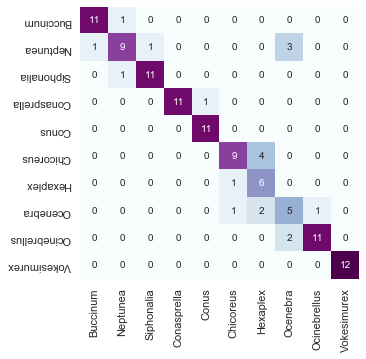

['shells_dists_srvf_all.csv', 0.836]


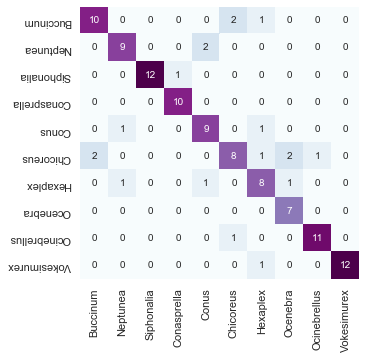

C:\Users\arian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['shells_dists_SRVF_nonpro_all.csv', 0.05]


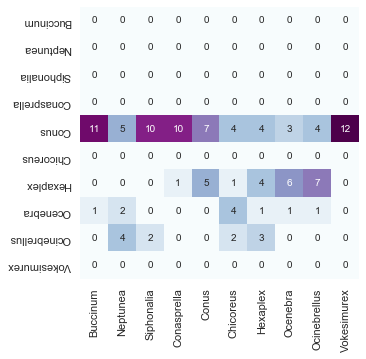

['shells_dists_SRVF_nonpro_all2.csv', 0.862]


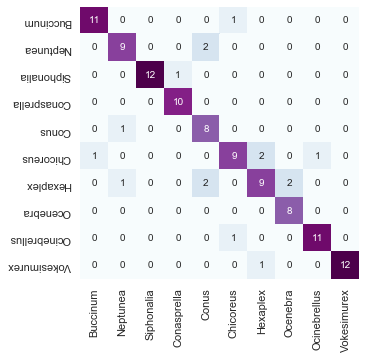

['shells_dists_SRVF_proc_all.csv', 0.862]


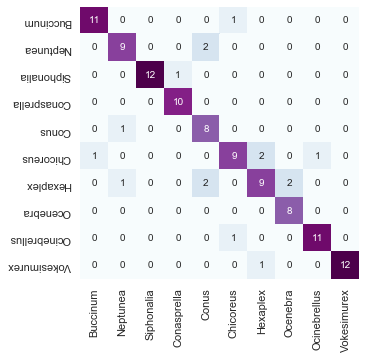

['shells_final_dists_SRVF_proc_all.csv', 0.831]


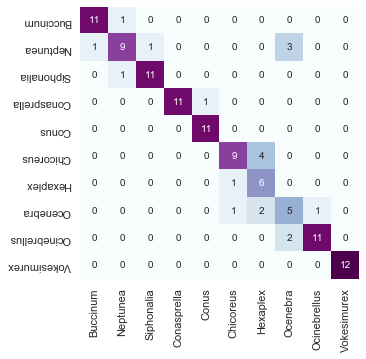

['Shells_SRVF_Closed_oldCode.csv', 0.836]


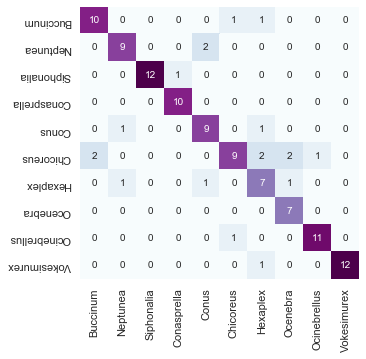

['SRVF_Closed_shells.csv', 0.721]


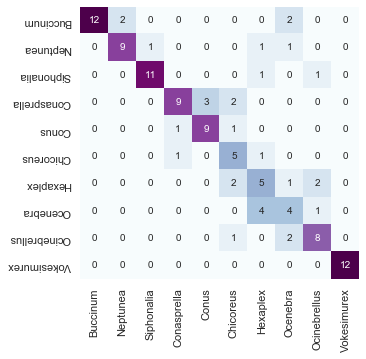

['All_DistMats\\Best_S\\shells_dists_srvf_all - Copy.csv', 0.836]


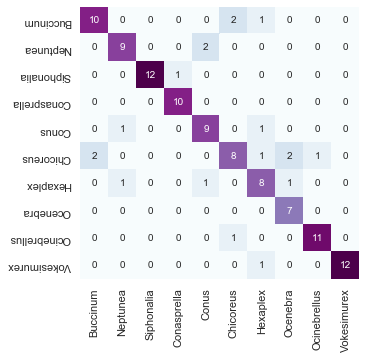

['All_DistMats\\Best_S\\shells_dists_srvf_all.csv', 0.836]


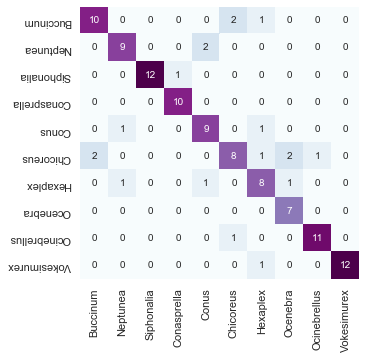

['All_DistMats\\Shells\\shells_dists_srvf_all.csv', 0.836]


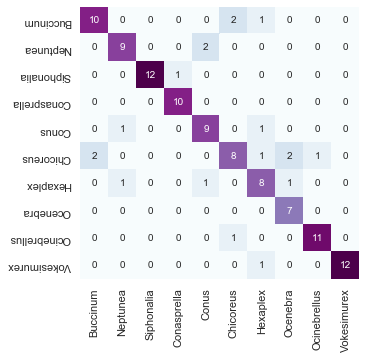

['DistMats\\Edited\\shells2_dists_SRVF_scaled_all.csv', 0.831]


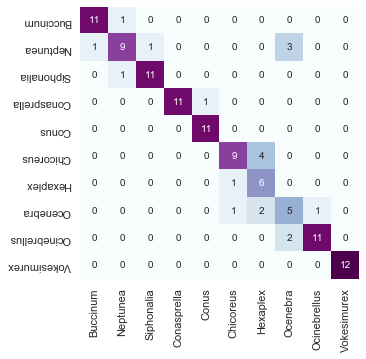

['KNN\\DMs\\Shells_SRVF.csv', 0.836]


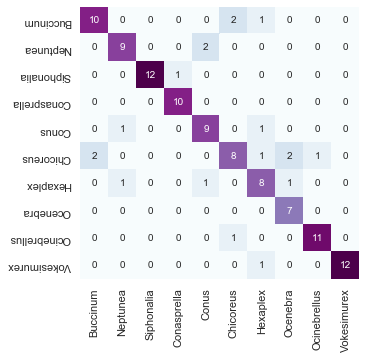

['shells_distmats\\v1\\Shells_SRVF_Closed_oldCode.csv', 0.836]


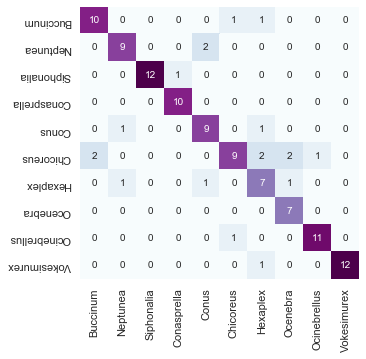

FileNotFoundError: [Errno 2] File b'C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells_distmats\\v2\\Shells_SRVF_Closed_oldCode.csv' does not exist: b'C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\shells_distmats\\v2\\Shells_SRVF_Closed_oldCode.csv'

In [18]:
for pth in files:
    
    pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"+pth

    dfDists = pd.read_csv(pth_)
    
    if len(dfDists) < 237:

        results, f1Score, topNeighbour = KNN_distMat(
            dfDists,
            dfMeta,
            tr,
            te,
            classType=int,
            neighbours=np.int_(np.linspace(3, 12, 10)),
            f1Average="weighted",
            inMeta=True,
        )

        f1 = np.round(f1_score(list(results['actualClass']), list(results['predictedClass']), average='weighted'),3)
        print([pth,f1])
        CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)
        cm_df_sc = pd.DataFrame(CM).T

        fig,ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
        ax.set_xticklabels(nms,rotation=90)
        ax.yaxis.set_ticklabels(nms,rotation=180)
        plt.show()

['shells_distmats\\v2\\Shells_SRVF_Closed_v2.csv', 0.812]


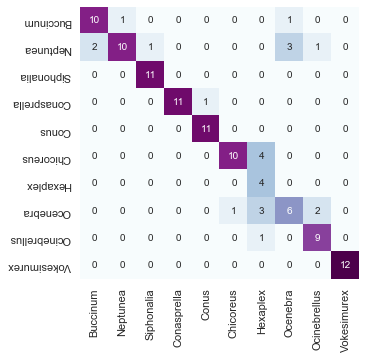

In [44]:
pth = files[-1]

pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"+pth

dfDists = pd.read_csv(pth_)

if len(dfDists) < 237:

    results2, f1Score, topNeighbour = KNN_distMat(
        dfDists,
        dfMeta,
        tr,
        te,
        classType=int,
        neighbours=np.int_(np.linspace(3, 12, 10)),
        f1Average="weighted",
        inMeta=True,
    )

    f1 = np.round(f1_score(list(results2['actualClass']), list(results2['predictedClass']), average='weighted'),3)
    print([pth,f1])
    CM = confusion_matrix(list(results2["actualClass"]), list(results2["predictedClass"]),labels=classes)
    cm_df_sc = pd.DataFrame(CM).T

    fig,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
    ax.set_xticklabels(nms,rotation=90)
    ax.yaxis.set_ticklabels(nms,rotation=180)
    plt.show()

['shells2_dists_SRVF_scaled_all.csv', 0.831]


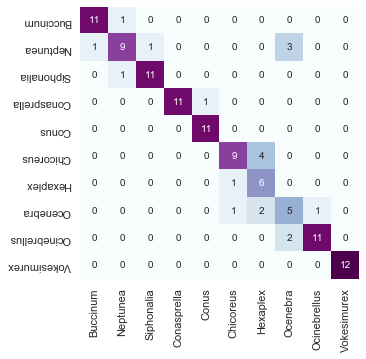

In [24]:
pth = files[0]

pth_ = "C:\\Users\\arian\\Documents\\GitHub\\pots\\Code\\"+pth

dfDists = pd.read_csv(pth_)

if len(dfDists) < 237:

    results, f1Score, topNeighbour = KNN_distMat(
        dfDists,
        dfMeta,
        tr,
        te,
        classType=int,
        neighbours=np.int_(np.linspace(3, 12, 10)),
        f1Average="weighted",
        inMeta=True,
    )

    f1 = np.round(f1_score(list(results['actualClass']), list(results['predictedClass']), average='weighted'),3)
    print([pth,f1])
    CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)
    cm_df_sc = pd.DataFrame(CM).T

    fig,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
    ax.set_xticklabels(nms,rotation=90)
    ax.yaxis.set_ticklabels(nms,rotation=180)
    plt.show()

In [48]:
CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)

CM = CM / CM.astype(np.float).sum(axis=1)

In [49]:
CM

array([[0.91666667, 0.09090909, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08333333, 0.81818182, 0.08333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09090909, 0.91666667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.09090909, 0.91666667,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.81818182, 0.08333333, 0.1       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36363636, 0.5       , 0.2       , 0.        , 0.        ],
       [0.        , 0.27272727, 0.       

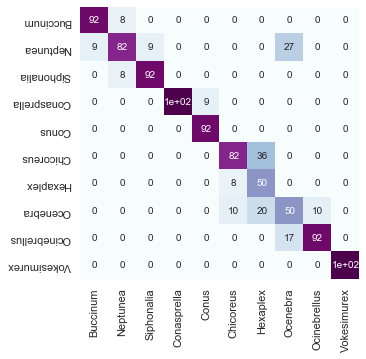

In [50]:
CM = confusion_matrix(list(results["actualClass"]), list(results["predictedClass"]),labels=classes)

CM = CM / CM.astype(np.float).sum(axis=1)

CM = np.round(CM * 100)

cm_df_sc = pd.DataFrame(CM).T

fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax.set_xticklabels(nms,rotation=90)
ax.yaxis.set_ticklabels(nms,rotation=180)
plt.show()

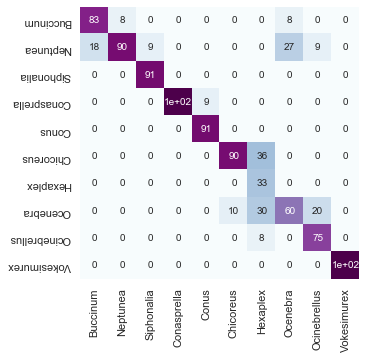

In [47]:
CM = confusion_matrix(list(results2["actualClass"]), list(results2["predictedClass"]),labels=classes)

CM = CM / CM.astype(np.float).sum(axis=1)

CM = np.int_(CM * 100)

cm_df_sc = pd.DataFrame(CM).T

fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_df_sc,ax=ax,cbar=False,annot=True,cmap="BuPu",annot_kws={"size": 10})
ax.set_xticklabels(nms,rotation=90)
ax.yaxis.set_ticklabels(nms,rotation=180)
plt.show()

In [ ]:
10